## Observations and Insights 

# Final Observations

1. Mouse Weight and Tumor Volume has a correlation of 0.84, which, being a strong positive correlation, suggests that as a mice's weight increases so does the tumor volume.
2. Based on the Final Tumor Volume in the boxplot diagram, Capomulin and Ramicane were the 2 most successful drugs at reducing tumor size.
3. There were a near even number of male vs female mice used in this study.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import seaborn as sns
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

In [2]:
mouse_metadata.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [3]:
mouse_metadata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249 entries, 0 to 248
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Mouse ID      249 non-null    object
 1   Drug Regimen  249 non-null    object
 2   Sex           249 non-null    object
 3   Age_months    249 non-null    int64 
 4   Weight (g)    249 non-null    int64 
dtypes: int64(2), object(3)
memory usage: 9.9+ KB


In [4]:
study_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [5]:
study_results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1893 entries, 0 to 1892
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Mouse ID            1893 non-null   object 
 1   Timepoint           1893 non-null   int64  
 2   Tumor Volume (mm3)  1893 non-null   float64
 3   Metastatic Sites    1893 non-null   int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 59.3+ KB


In [6]:
# Combine the data into a single dataset
df = pd.merge(study_results, mouse_metadata, on="Mouse ID", how="left")

# Display the data table for preview
df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [7]:
# Checking the number of mice.
df["Mouse ID"].nunique()

249

In [8]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
df.groupby(["Mouse ID", "Timepoint"]).size().sort_values(ascending=False)

Mouse ID  Timepoint
g989      20           2
          15           2
          10           2
          5            2
          0            2
                      ..
i334      20           1
          15           1
          10           1
          5            1
z969      45           1
Length: 1888, dtype: int64

In [9]:
# Optional: Get all the data for the duplicate mouse ID. 
mask = df["Mouse ID"] == "g989"
df.loc[mask]

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [10]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mask = df["Mouse ID"] != "g989"
df_merge = df.loc[mask].reset_index(drop=True)

df_merge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1880 entries, 0 to 1879
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Mouse ID            1880 non-null   object 
 1   Timepoint           1880 non-null   int64  
 2   Tumor Volume (mm3)  1880 non-null   float64
 3   Metastatic Sites    1880 non-null   int64  
 4   Drug Regimen        1880 non-null   object 
 5   Sex                 1880 non-null   object 
 6   Age_months          1880 non-null   int64  
 7   Weight (g)          1880 non-null   int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 117.6+ KB


In [11]:
# Checking the number of mice in the clean DataFrame.
df_merge["Mouse ID"].nunique()

248

## Summary Statistics

In [12]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
avgs = df_merge.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
meds = df_merge.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
varss = df_merge.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
stds = df_merge.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
sems = df_merge.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()

sum1 = pd.concat([avgs, meds, varss, stds, sems], axis=1)
sum1.columns = ["Mean", "Median", "Var", "Std", "SEM"]
sum1

,Mean,Median,Var,Std,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [13]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
sum2 = df_merge.groupby("Drug Regimen").agg({"Tumor Volume (mm3)": ["mean", "median", "var", "std", "sem"]})
sum2

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

In [14]:
df_drug = df_merge["Drug Regimen"].value_counts().reset_index()
df_drug.columns = ["Drug", "Count"]
df_drug

,Drug,Count
0,Capomulin,230
1,Ramicane,228
2,Ketapril,188
3,Naftisol,186
4,Zoniferol,182
5,Stelasyn,181
6,Placebo,181
7,Infubinol,178
8,Ceftamin,178
9,Propriva,148


## Bar and Pie Charts

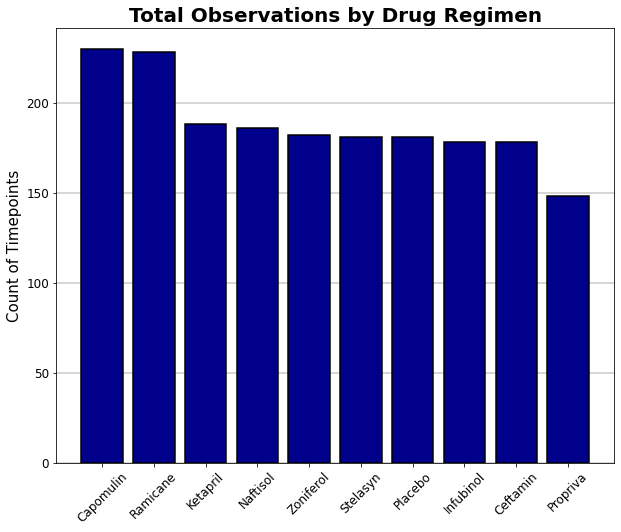

In [15]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

plt.figure(figsize=(10, 8))

plt.bar(df_drug.Drug, df_drug.Count, color='darkblue', align="center", edgecolor="black", linewidth="1.5", zorder=2)

plt.title("Total Observations by Drug Regimen", fontsize=20, fontweight="bold")
plt.ylabel("Count of Timepoints", fontsize=15)
plt.grid(axis="y", alpha=.5, zorder=1, linewidth=2)
plt.tick_params(axis='both', labelsize=12)
plt.xticks(rotation=45)

plt.show()

<AxesSubplot:title={'center':'Total Observations by Drug Regimen'}, ylabel='Count of Timepoints'>

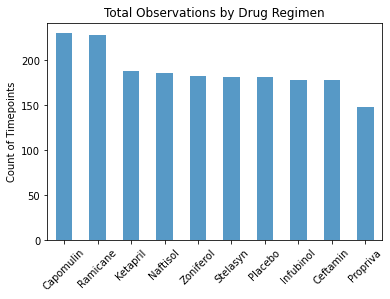

In [16]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
df_drug2 = df_merge["Drug Regimen"].value_counts()
df_drug2.columns = ["Drug", "Count"]
df_drug2.plot(kind='bar',alpha=0.75, rot=45, ylabel="Count of Timepoints", title="Total Observations by Drug Regimen")

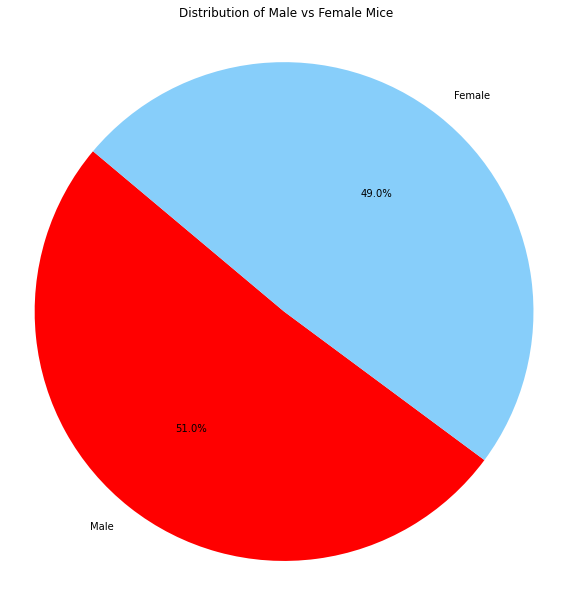

In [17]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
df_sex = df_merge.Sex.value_counts().reset_index()
df_sex.columns = ["Sex", "Count"]
df_sex

colors = ["red", "lightskyblue"]

plt.figure(figsize=(10, 10))
plt.pie(df_sex.Count, labels=df_sex.Sex, colors=colors, autopct="%1.1f%%", startangle=140)
plt.axis("equal")
plt.title("Distribution of Male vs Female Mice\n")

plt.show()

<AxesSubplot:title={'center':'Distribution of Male vs Female Mice\n'}, ylabel='Sex'>

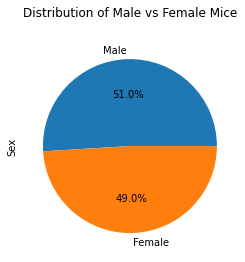

In [18]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
df_sex2 = df_merge.Sex.value_counts()
df_sex2.columns = ["Sex", "Count"]

df_sex2.plot(kind='pie', title="Distribution of Male vs Female Mice\n", autopct='%1.1f%%')

## Quartiles, Outliers and Boxplots

In [19]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
times = df_merge.groupby("Mouse ID").Timepoint.max().reset_index()

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
df_times = pd.merge(df_merge, times, on=["Mouse ID", "Timepoint"], how="inner")
mask = df_times["Drug Regimen"].isin(["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])
df_ftv = df_times.loc[mask].reset_index(drop=True)
df_ftv

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,u153,0,45.000000,0,Ceftamin,Female,11,25
1,b447,0,45.000000,0,Ceftamin,Male,2,30
2,x226,0,45.000000,0,Ceftamin,Male,23,28
3,t573,0,45.000000,0,Ceftamin,Female,15,27
4,c326,5,36.321346,0,Infubinol,Female,18,25
...,...,...,...,...,...,...,...,...
95,a644,45,32.978522,1,Ramicane,Female,7,17
96,i177,45,33.562402,3,Ramicane,Male,10,18
97,r944,45,41.581521,2,Capomulin,Male,12,25
98,u364,45,31.023923,3,Capomulin,Male,18,17


In [20]:
# Put treatments into a list for for loop (and later for plot labels)
drugs = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in drugs:
    # Locate the rows which contain mice on each drug and get the tumor volumes
    sub = df_ftv.loc[df_ftv["Drug Regimen"] == drug, "Tumor Volume (mm3)"]
    
    lower_q = sub.quantile(0.25)
    upper_q = sub.quantile(0.75)
    iqr = upper_q - lower_q
    
    # Determine outliers using upper and lower bounds
    lower_bound = lower_q - 1.5*iqr
    upper_bound = upper_q + 1.5*iqr
    
    mask = (df_ftv["Drug Regimen"] == drug) & ((df_ftv["Tumor Volume (mm3)"] > upper_bound) | (df_ftv["Tumor Volume (mm3)"] < lower_bound))
    outliers = df_ftv.loc[mask]
    print(outliers)
    
    # add subset 
    data.append(sub)

Empty DataFrame
Columns: [Mouse ID, Timepoint, Tumor Volume (mm3), Metastatic Sites, Drug Regimen, Sex, Age_months, Weight (g)]
Index: []
Empty DataFrame
Columns: [Mouse ID, Timepoint, Tumor Volume (mm3), Metastatic Sites, Drug Regimen, Sex, Age_months, Weight (g)]
Index: []
  Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
4     c326          5           36.321346                 0    Infubinol   

      Sex  Age_months  Weight (g)  
4  Female          18          25  
Empty DataFrame
Columns: [Mouse ID, Timepoint, Tumor Volume (mm3), Metastatic Sites, Drug Regimen, Sex, Age_months, Weight (g)]
Index: []


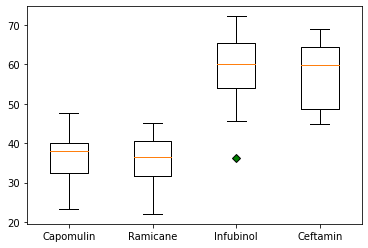

In [21]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
green_diamond = dict(markerfacecolor='g', marker='D')
plt.boxplot(data, labels=drugs, flierprops=green_diamond)
plt.show()

## Line and Scatter Plots

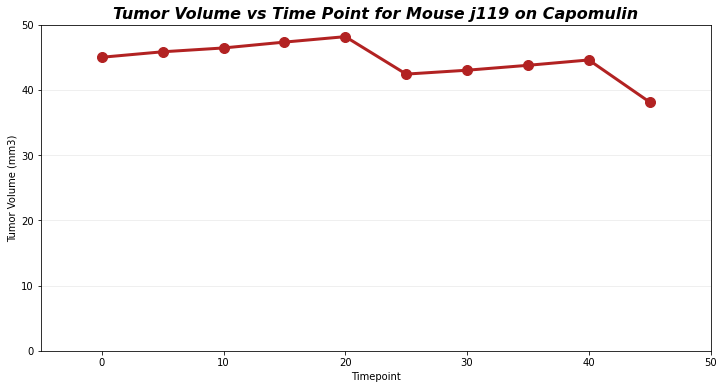

In [22]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
mask = df_merge["Drug Regimen"] == "Capomulin"
data = df_merge.loc[mask]
mask2 = data["Mouse ID"] == "j119"
data2 = data.loc[mask2]
data2

plt.figure(figsize=(12, 6))
plt.plot(data2["Timepoint"], data2["Tumor Volume (mm3)"], linewidth=3, marker ='o', markersize=10, color='firebrick')
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Tumor Volume vs Time Point for Mouse j119 on Capomulin", fontsize=16, fontstyle="italic", fontweight="bold")
plt.xlim(-5, 50)
plt.ylim(0, 50)
plt.grid(axis="y", alpha=0.25)
plt.show()

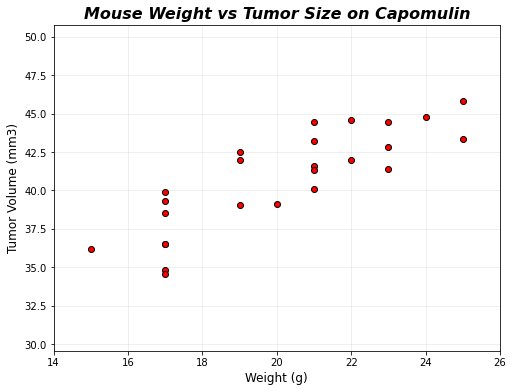

In [23]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
mask = df_merge["Drug Regimen"] == "Capomulin"

data = df_merge.loc[mask].groupby("Mouse ID")[["Tumor Volume (mm3)", "Weight (g)"]].mean().reset_index()

plt.figure(figsize=(8, 6))

plt.scatter(data["Weight (g)"], data["Tumor Volume (mm3)"], marker="o", facecolors="red", edgecolors="black", alpha=1, zorder=2)

plt.ylim(min(data["Tumor Volume (mm3)"])-5, max(data["Tumor Volume (mm3)"])+5)
plt.xlim(min(data["Weight (g)"])-1, max(data["Weight (g)"])+1)
plt.xlabel("Weight (g)", fontsize=12)
plt.ylabel("Tumor Volume (mm3)", fontsize=12)
plt.grid(alpha=0.25, zorder=1)
plt.title("Mouse Weight vs Tumor Size on Capomulin", fontsize=16, fontstyle="italic", fontweight="bold")

plt.show()

## Correlation and Regression

In [24]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
corr=round(st.pearsonr(data['Weight (g)'],data['Tumor Volume (mm3)'])[0],2)
print(f"The correlation between mouse weight and average tumor volume is {corr}")

x_values = data['Weight (g)']
y_values = data['Tumor Volume (mm3)']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(line_eq)

The correlation between mouse weight and average tumor volume is 0.84
y = 0.95x + 21.55


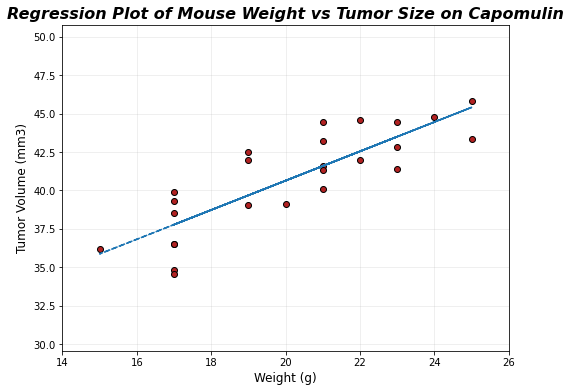

In [25]:
plt.figure(figsize=(8, 6))

plt.scatter(data["Weight (g)"], data["Tumor Volume (mm3)"], marker="o", facecolors="firebrick", edgecolors="black", alpha=1, zorder=2)
plt.plot(x_values,regress_values,"--")
plt.ylim(min(data["Tumor Volume (mm3)"])-5, max(data["Tumor Volume (mm3)"])+5)
plt.xlim(min(data["Weight (g)"])-1, max(data["Weight (g)"])+1)
plt.xlabel("Weight (g)", fontsize=12)
plt.ylabel("Tumor Volume (mm3)", fontsize=12)
plt.grid(alpha=0.25, zorder=1)
plt.title("Regression Plot of Mouse Weight vs Tumor Size on Capomulin", fontsize=16, fontstyle="italic", fontweight="bold")

plt.show()